In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the
%matplotlib inline

In [ ]:

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


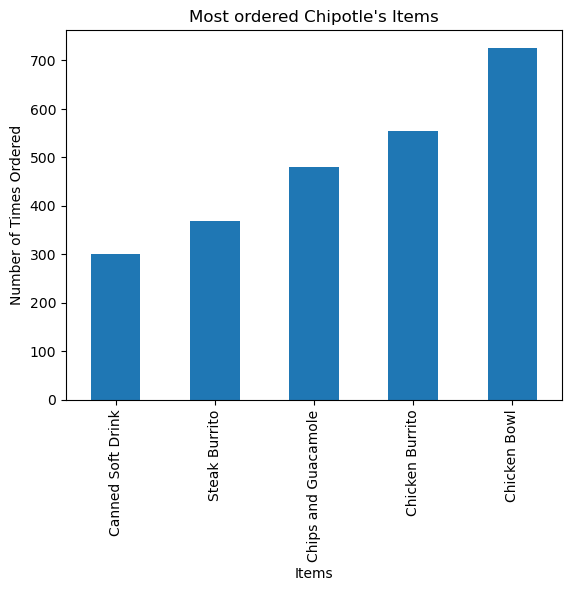

In [3]:
# Step 5. Create a histogram of the top 5 items bought
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = True)[45:50]

# create the plot
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

(0.0, 36.7)

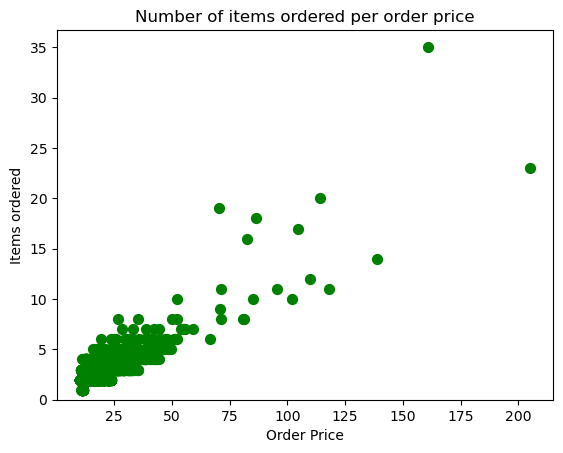

In [4]:
# Step 6. Create a scatterplot with the number of items orderered per order price
# Hint: Price should be in the X-axis and Items ordered in the Y-axis
# create a list of prices
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


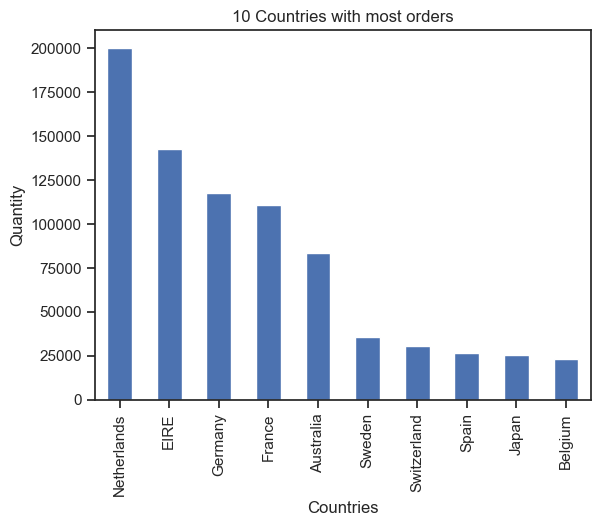

In [7]:
# Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

In [8]:
# Step 5. Exclude negative Quantity entries
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


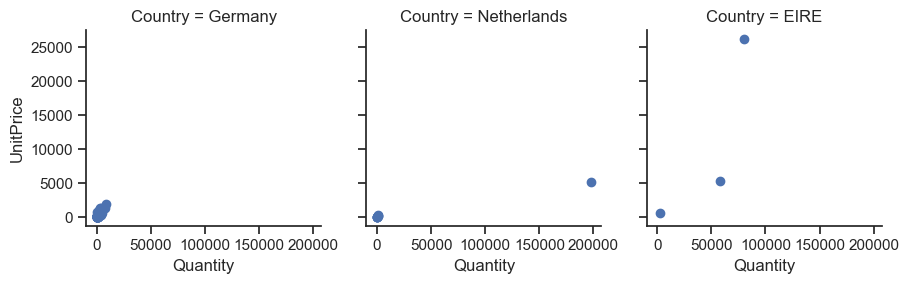

In [9]:
# Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

In [2]:
import torch
torch.matmul(torch.rand(3,2), torch.rand(2,8))

tensor([[0.1840, 0.1250, 0.1059, 0.1814, 0.0272, 0.1720, 0.1490, 0.0272],
        [1.4072, 0.8025, 0.6464, 1.4528, 0.2938, 0.7670, 1.2150, 0.6965],
        [0.2600, 0.1684, 0.1409, 0.2598, 0.0431, 0.2135, 0.2146, 0.0647]])

In [ ]:
def save_mlflow_artifacts(
    ckpt_path: str,
    mlf_run_id: str,
    model_name: str,
    val_experiment_id: str,
    val_run_id: str,
    training_params: Dict,
    log_path: str,
    args: argparse.Namespace
):
    """
    Save best model and parameters to MLflow Experiments and Registry.

    Parameters:
        ckpt_path (str): Path to the best model checkpoint.
        mlf_run_id (str): MLflow run ID.
        model_name (str): Name of the model for MLflow registry.
        val_experiment_id (str): MLflow experiment ID for validation run
        val_run_id (str): MLflow run ID for validation run
        training_params (dict): Training parameters to be saved.
        log_path (str): Path to the training logs.
        args (argparse.Namespace): Command-line arguments.

    Returns:
        None
    """
    # Save training dataset parameters for later inference
    training_params_path = os.path.join(log_path, 'dataset_parameters.pkl')
    with open(training_params_path, "wb") as f:
        pickle.dump(training_params, f)

    max_retries = 3
    delay_seconds = 5
    retries = 0
    while retries < max_retries:
        try:
            with mlflow.start_run(run_id=mlf_run_id):
                model_path = 'model'
                best_model = TemporalFusionTransformer.load_from_checkpoint(
                    ckpt_path)
                mlflow.pytorch.log_model(
                    pytorch_model=best_model,
                    artifact_path=model_path)
                mlflow.log_artifact(local_path=ckpt_path)
                mlflow.log_artifact(training_params_path)

                # Register model if training run
                if not args.use_validation:
                    model_uri = f"runs:/{mlf_run_id}/{model_path}"
                    model_details = mlflow.register_model(
                        model_uri=model_uri, name=model_name)

                    # Update model tag and stage
                    client = MlflowClient()
                    client.set_registered_model_tag(
                        name=model_details.name,
                        key="release",
                        value=args.release_tag)
                    client.transition_model_version_stage(
                        name=model_details.name,
                        version=model_details.version,
                        stage=args.training_model_stage)
                    client.set_model_version_tag(
                        name=model_details.name,
                        version=model_details.version,
                        key="run_anchor_date",
                        value=args.run_anchor_date)
                    client.set_model_version_tag(
                        name=model_details.name,
                        version=model_details.version,
                        key="val_experiment_id",
                        value=val_experiment_id)
                    client.set_model_version_tag(
                        name=model_details.name,
                        version=model_details.version,
                        key="val_run_id",
                        value=val_run_id)
                return
        except Exception as e:
            print(f"""An error occurred while connecting MLFlow:
                  {e}. Retrying...""")
            retries += 1
            time.sleep(delay_seconds)
    print(f"Failed to connect to MLFlow after {max_retries} retries.")

    return

In [ ]:
from pyspark.sql.functions import udf, col, lit
from pyspark.sql.types import ArrayType, StringType, IntegerType
import pyspark.sql.functions as F

# Assuming 'spark' is your SparkSession
# Assuming 'item_list' is a Python list of item names
# Assuming 'top_rec_ind_list' is your list of indices

# Define UDF to map indices to item numbers
def map_indices_to_items(indices, item_list):
    return [item_list[i] for i in indices]

# Register UDF for mapping
map_indices_to_items_udf = udf(lambda indices: map_indices_to_items(indices, item_list), ArrayType(StringType()))

# Define UDF to handle the anchor logic
def handle_anchor(idx, recommendations, num_of_rec):
    if idx != recommendations[0]:
        filtered = [x for x in recommendations if x != idx]
        recommendations = [idx] + filtered[:num_of_rec]
    else:
        recommendations = recommendations[:num_of_rec + 1]
    return recommendations

# Register the UDF for handling the anchor
handle_anchor_udf = udf(handle_anchor, ArrayType(IntegerType()))

# Create DataFrame with top recommendations indices
top_rec_ind_df = spark.createDataFrame([(row,) for row in top_rec_ind_list], ['indices'])

# Apply the 'handle anchor' UDF to adjust the recommendations
top_rec_ind_df = top_rec_ind_df.withColumn('index', F.monotonically_increasing_id())  # Create an index column
top_rec_ind_df = top_rec_ind_df.withColumn('adjusted_indices', handle_anchor_udf(col('index'), col('indices'), lit(num_of_rec)))

# Map the adjusted indices to item names
top_rec_ind_df = top_rec_ind_df.withColumn('ns_top_rec', map_indices_to_items_udf(col('adjusted_indices')))

# Show the result
top_rec_ind_df.select('index', 'ns_top_rec').show(truncate=False)


In [ ]:
write the code in Python and PySpark to add a new index column to a 3*3 DataFrame indicating correlation scores between 3 items, perform an operation similar to pandas melt with the specified parameters, and sort the values as described


from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id, expr

# Initialize a SparkSession
spark = SparkSession.builder.appName("melt_dataframe").getOrCreate()

# Sample data representing a 3x3 DataFrame of correlation scores as strings
data = [("0.1", "0.2", "0.3"),
        ("0.4", "0.5", "0.6"),
        ("0.7", "0.8", "0.9")]

# Define the schema of the DataFrame
columns = ["item1", "item2", "item3"]

# Create a DataFrame
df = spark.createDataFrame(data, schema=columns)

# Add a new index column
df = df.withColumn("index", monotonically_increasing_id())

# Function to melt a DataFrame similar to pandas' melt function
def melt(df, id_vars, value_vars, var_name, value_name):
    # Create array<struct<variable: str, value: str>>
    _vars_and_vals = expr(
        "stack(" + str(len(value_vars)) + ", " + ", ".join(["'" + c + "', " + c for c in value_vars]) + ")"
    )

    # Add to the DataFrame and explode
    _tmp = df.withColumn("_vars_and_vals", _vars_and_vals) \
        .select(id_vars + ["_vars_and_vals.variable", "_vars_and_vals.value"])

    # Build and return the final DataFrame
    return _tmp.withColumnRenamed("variable", var_name).withColumnRenamed("value", value_name)

# Perform the melt operation
df_melted = melt(df, id_vars=["index"], value_vars=columns, var_name="recommended", value_name="score")

# Convert the 'score' column to float type for sorting
df_melted = df_melted.withColumn("score", df_melted["score"].cast("float"))

# Sort the DataFrame
df_sorted = df_melted.orderBy(["index", "score"], ascending=[True, False])

# Show the final DataFrame
df_sorted.show()

# Stop the SparkSession
spark.stop()



In [ ]:
    def get_deno_nume_df(self, input_pred_table):
        if self.model_type == 'svd' or self.model_type == 'neg':
            input_actual_table = self.input_actual_table_order
        else:
            input_actual_table = self.input_actual_table

        if input_actual_table.rdd.isEmpty(): raise ValueError("input_actual_table is empty.")

        # Explode the 'cart_product_cc' column and self-join to find combinations
        input_actual_table = input_actual_table.select('session_id', 'cart_product_cc')

        input_actual_explode_table = input_actual_table.withColumn('cart_product_cc', F.explode('cart_product_cc'))
        input_actual_explode_table.cache()

        actual_df_anchor_affinitive = input_actual_explode_table.alias('table1') \
            .join(input_actual_explode_table.alias('table2'), F.col('table1.session_id') == F.col('table2.session_id')) \
            .select(F.col('table1.session_id'),
                    F.col('table1.cart_product_cc').alias('anchor_cc'),
                    F.col('table2.cart_product_cc').alias('affinitive_cc')) \
            .filter(F.col('anchor_cc') != F.col('affinitive_cc'))


        # Explode the affinitive_col in the prediction table
        input_pred_explode_table = input_pred_table.withColumn(self.affinitive_col, F.explode(self.affinitive_col))
        input_pred_explode_table.cache()

        # Join the exploded actual and prediction tables on the anchor and affinitive columns
        pred_result_df5 = input_pred_explode_table \
            .join(actual_df_anchor_affinitive,
                  (input_pred_explode_table.anchor_cc == actual_df_anchor_affinitive.anchor_cc) &
                  (input_pred_explode_table[self.affinitive_col] == actual_df_anchor_affinitive.affinitive_cc),
                  'inner') \
            .select(actual_df_anchor_affinitive.session_id,
                    actual_df_anchor_affinitive.anchor_cc,
                    actual_df_anchor_affinitive.affinitive_cc)

        # Explode the affinitive_col and count the occurrences of each anchor_cc
        pred_result_df2 = input_pred_explode_table.select('anchor_cc', self.affinitive_col) \
                                          .groupBy('anchor_cc') \
                                          .count() \
                                          .withColumnRenamed('count', self.affinitive_col)

        # Explode the cart_product_cc and count the occurrences of each unique value
        input_actual_explode_table2 = input_actual_explode_table.select('cart_product_cc', 'session_id') \
                                                        .groupBy('cart_product_cc') \
                                                        .count() \
                                                        .withColumnRenamed('count', 'session_count')
        pred_result_df3 = pred_result_df2.join(input_actual_explode_table2, pred_result_df2.anchor_cc == input_actual_explode_table2.cart_product_cc, 'inner') \
                                        .drop('cart_product_cc')
        pred_result_df3 = pred_result_df3.withColumn('denominator', F.col(self.affinitive_col) * F.col('session_count'))

        spark.catalog.clearCache()

        return pred_result_df5, actual_df_anchor_affinitive, pred_result_df3


def get_evaluation(self,recommender_evaluation_instance, pred_result_df):
    precision_output,recall_output =  recommender_evaluation_instance.compute_precision_and_recall(pred_result_df)
    return precision_output, recall_output

precision_output, recall_output = model.get_evaluation(recommender_evaluation_instance, pred_result_df)

In [ ]:
def get_evaluation(self, recommender_evaluation_instance, pred_result_df):
    # Convert Spark DataFrame to Pandas DataFrame
    pandas_df = pred_result_df.toPandas()

    # Convert Pandas DataFrame to PyTorch Tensor
    tensor = torch.tensor(pandas_df.values, dtype=torch.float32)

    # Move the tensor to the GPU
    tensor = tensor.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    # Compute precision and recall with the tensor
    precision_output, recall_output = recommender_evaluation_instance.compute_precision_and_recall(tensor)
    return precision_output, recall_output


In [1]:
import torch
from torch import nn

# Creating an embedding layer with 10 embeddings of size 3
embedding = nn.Embedding(num_embeddings=10, embedding_dim=3)

# Suppose we have input indices [1, 2, 4, 5]
input_indices = torch.LongTensor([[1, 2, 4, 5]])

# Get the corresponding word embeddings
word_embeddings = embedding(input_indices)
print(word_embeddings)


tensor([[[-4.2697e-01,  1.7265e-03,  1.1456e+00],
         [ 1.3805e+00,  1.1731e+00, -4.7548e-01],
         [-1.8558e+00, -2.1104e-01, -4.4234e-01],
         [-4.0241e-01, -1.7394e+00, -9.1193e-01]]],
       grad_fn=<EmbeddingBackward0>)
